In [1]:
"""Lean Project Valuation Model - a three-stage cashflow model.

This simulates a payoff process with pivot/exercise decisions as well as
fixed development and operations costs.

Typical usage example:

  payoff = PayoffProcess(...)
  c1, c2 = CashflowProcess(...), CashflowProcess(...)
  project_value = LeanProjectValuation(payoff, c1, c2).npv()

"""

import numpy as np
from numpy.random import RandomState
from matplotlib import pyplot as plt

from processes import GeometricBrownianMotion
from lpv import LeanProjectValuation


In [2]:
# Simulation Parameters
N = 25        # no simulations
T = 3         # simulation periods
STEP = 100     # timesteps per period
DRIFT = 0.02  # cashflow drift rate
VOL = 0.2     # cashflow volatility
START = 3.0   # initial cashflow rate c0

# Plotting constants
TIME_ARRAY = np.linspace(0, T, STEP*T+1)
FIGSIZE = (8,6)


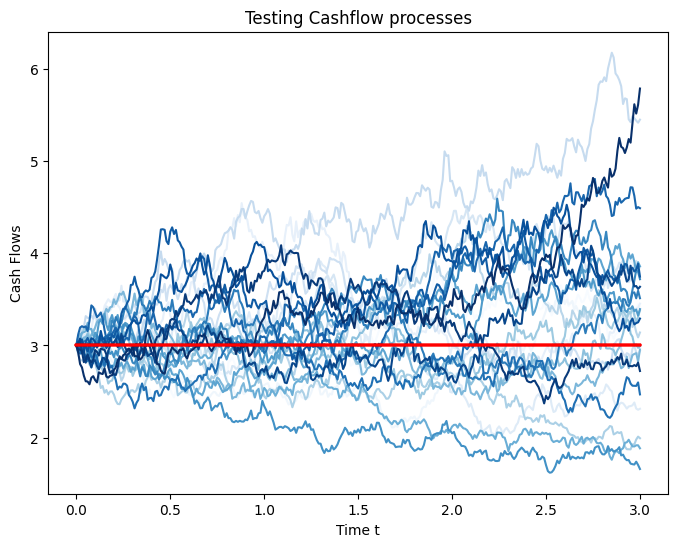

Payoff Process - trials: 25, drift: 0.02, vol: 0.2


In [3]:
# Cashflow Processes
net_cf = GeometricBrownianMotion(mu=DRIFT, sigma=VOL)
dev_cost = GeometricBrownianMotion(mu=0.0, sigma=0.0)

# Simulate
rnd = RandomState(seed=1232)
cf = net_cf.simulate(TIME_ARRAY, N, 3.0, rnd)
cd = dev_cost.simulate(TIME_ARRAY, N, 3.0, rnd)

assert cf.shape == cd.shape, "Simulated cashflows must have the same shape"
assert cd.all() >= 0, "All geometric brownian motion cashflows must be non-negative"

# plot all cashflow and cost processes
plt.figure(figsize=FIGSIZE)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, N))))

plt.plot(TIME_ARRAY, cf, label='Arithmetic')
plt.plot(TIME_ARRAY, cd, color='red', label='Geometric')

plt.title("Testing Cashflow processes")
plt.xlabel("Time t")
plt.ylabel("Cash Flows")
plt.show()

txt = f"""Payoff Process - trials: {N}, drift: {DRIFT}, vol: {VOL}"""
print(txt)

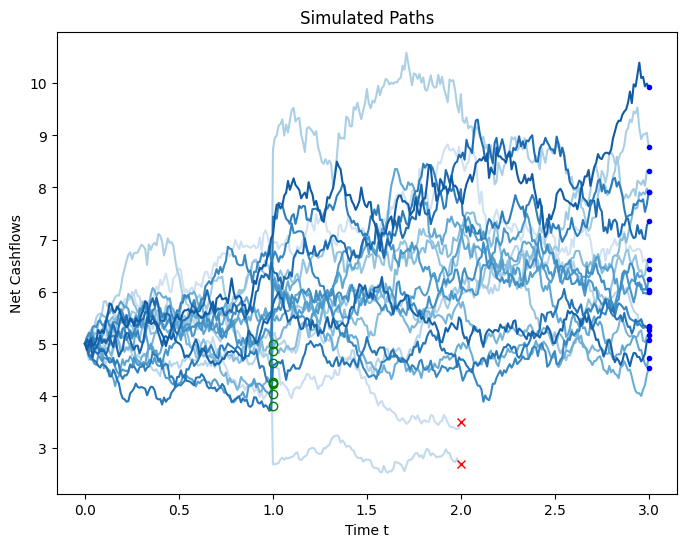

Payoff Process - trials: 25, drift: 0.02, vol: 0.2


In [7]:
# create project
project = LeanProjectValuation(DRIFT, VOL, 5.0, 10.0, 0.05, rand_seed=1232, no_sims=20)
unaltered_paths = project.generate_paths(TIME_ARRAY, 3)
ex_dec = project.exercise_decisions

# plot all cashflow and cost processes
plt.figure(figsize=FIGSIZE)

plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0.2, 1, N))))
plt.plot(TIME_ARRAY, project.paths)

# plot pivots
for stage in [1]:
    pivots = [v for ex,v,_ in project.pivot_decisions[stage] if ex == 0]
    plt.plot(np.repeat([stage],len(pivots)), pivots, "go", markerfacecolor='none')

for stage in [2]:
    abandons = [v for p,ex,v,_ in project.exercise_decisions if ex == -1]
    plt.plot(np.repeat([stage],len(abandons)), abandons, "rx")

completions = project.paths[-1,:]
plt.plot(np.repeat([T],len(completions)), completions, "b.")

plt.title("Simulated Paths")
plt.xlabel("Time t")
plt.ylabel("Net Cashflows")
plt.show()

txt = f"""Payoff Process - trials: {N}, drift: {DRIFT}, vol: {VOL}"""
print(txt)

In [5]:
print("NPV Project: ", project.valuation())

NPV Project:  4.020123202507046
